# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_prism.pickle') as f:
        model_prism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (50,25)
Number of data: 1250.0
dx: 244.9 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_prism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 40.0 degree
Main field declination: 45.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_prism['m_R']
print 'Inclination: %.1f degree' % model_prism['inc_R']
print 'Declination: %.1f degree' % model_prism['dec_R']

Intensity: 5.0 A/m
Inclination: 30.0 degree
Declination: 20.0 degree


In [16]:
inc_R,dec_R = model_prism['inc_R'],model_prism['dec_R']

## Generating the layer with my function 

In [17]:
h = 1150.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e3,1e4,1e5,1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_prism_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_prism_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-1.98303830921 -6.00997397557
i = 1
3.47588000355 -3.93819754062
i = 2
6.77936652728 -2.71808642152
i = 3
9.07958598773 -1.70462551915
i = 4
10.8117246465 -0.775867002575
i = 5
12.1828328588 0.103496850418
i = 6
13.3167130327 0.937876276862
i = 7
14.2854558895 1.72723957983
i = 8
15.1343486765 2.48146703851
i = 9
15.8850797662 3.22055359065
i = 10
16.5547778452 3.94067610162
i = 11
17.1578741454 4.63708305822
i = 12
17.7049751279 5.30967677074
i = 13
18.2026053529 5.95600896718
i = 14
18.6577981558 6.57433260854
i = 15
19.0750453359 7.16128380735
i = 16
19.4584908705 7.71588219651
i = 17
19.8126896663 8.2396734477
i = 18
20.1408857926 8.73074840129
i = 19
20.4458616287 9.18876908214
i = 20
20.7299055456 9.62302167708
i = 21
20.9951671121 10.035454276
i = 22
21.2432360734 10.4272603194
i = 23
21.4754454233 10.7995834359
i = 24
21.6931637762 11.1533088114
i = 25
21.8976164364 11.4885214066
i = 26
22.0899701755 11.8053701342
i = 27
22.2712437983 12.1032897272
i = 28
22.4423305691 12

25.4783270556 16.7315731703
i = 62
25.5337353696 16.800923031
i = 63
25.5880773142 16.8683838784
i = 64
25.6413924586 16.9339627999
i = 65
25.6937188719 16.997700589
i = 66
25.7450997486 17.0596300099
i = 67
25.7956122093 17.1200490191
i = 68
25.845283571 17.1790049882
i = 69
25.8941407672 17.2365376152
i = 70
25.942206437 17.2926758671
i = 71
25.9895010157 17.3474425646
i = 72
26.0360400198 17.4008494902
i = 73
26.0818483923 17.452920694
i = 74
26.1269659332 17.5037879701
i = 75
26.1714238722 17.553554718
i = 76
26.2152387896 17.6022441486
i = 77
26.2584272161 17.6498802638
i = 78
26.3010084038 17.6964815584
i = 79
26.3429920709 17.742061757
i = 80
26.3843924198 17.786640234
i = 81
26.4252210657 17.8302544625
i = 82
26.4654992356 17.8729732667
i = 83
26.5052382978 17.9148306109
i = 84
26.5444465876 17.9558222218
i = 85
26.5831323844 17.9959356224
i = 86
26.6213009145 18.0351831215
i = 87
26.6589633685 18.0736231377
i = 88
26.6961292939 18.1113339375
i = 89
26.7328067831 18.1483600231


27.7370278362 19.0507773195
i = 123
27.762683404 19.0701748145
i = 124
27.7881278929 19.0892810159
i = 125
27.8133684283 19.1081066537
i = 126
27.8384076997 19.1266554293
i = 127
27.8632414849 19.1449338166
i = 128
27.8878712795 19.1629461717
i = 129
27.9122993596 19.1806963836
i = 130
27.9365279641 19.1981920197
i = 131
27.9605590885 19.2154385329
i = 132
27.984394048 19.2324394547
i = 133
28.0080353444 19.2491975471
i = 134
28.0314853141 19.2657155991
i = 135
28.0547465828 19.2820006021
i = 136
28.0778197163 19.2980496493
i = 137
28.1007050144 19.3138629899
i = 138
28.1234035937 19.3294436546
i = 139
28.1459175196 19.3447949559
i = 140
28.1682488267 19.3599201545
i = 141
28.1903993417 19.3748220896
i = 142
28.2123710472 19.3895040355
i = 143
28.2341660837 19.4039714493
i = 144
28.2557863684 19.418227348
i = 145
28.2772327439 19.4322736352
i = 146
28.2985105033 19.4461237077
i = 147
28.319620765 19.4597904993
i = 148
28.3405652484 19.4732764149
i = 149
28.3613456499 19.4865838235
i = 

36.6644485452 16.0243133545
i = 20
37.04332558 16.0239575723
i = 21
37.3645972512 16.0191243356
i = 22
37.6367338438 16.0123481374
i = 23
37.8664105633 16.0051925614
i = 24
38.0604726416 15.9985086621
i = 25
38.2244948297 15.9933670071
i = 26
38.3629141986 15.9891667439
i = 27
38.4792737453 15.9852776962
i = 28
38.4792737453 15.9852776962


## L-curve visualization

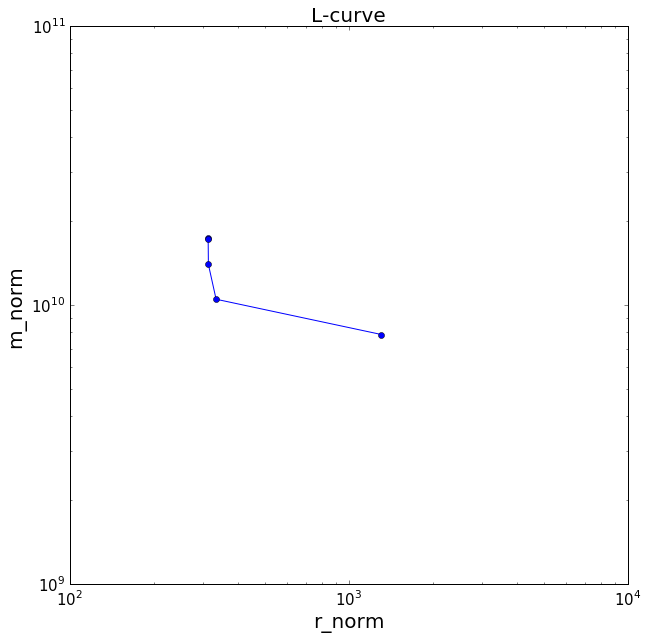

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
